This workbook performs tests of the prediction of "stop sign" slant angles

In [2]:
import utils
import os

import pickle
from keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input


Using TensorFlow backend.


utils.py loaded


In [3]:
X_test = pickle.load(open( "X_test.p", "rb" )) # reload the file names allocated for test

Reconstruct the network model from the saved model file:

In [4]:
model_location = os.path.join('.', 'models', 'resnet50_regression-40-0.00.hdf5')
# resnet50_regression-45-0.00.hdf5 past very successful run
model = load_model(model_location)

Perform prediction on the test samples:

In [5]:
batch_size = 64
out = model.evaluate_generator(
    utils.DataGenerator(
        X_test,
        input_shape=(275, 275, 3),
        batch_size=batch_size,
        one_hot=False,
        preprocess_func=preprocess_input,
        shuffle=False
    ),
    steps=len(X_test)/batch_size
)

print('Test loss:', out)

('Test loss:', 5.496482169421922e-05)


Randomly select a few test samples to exam the prediction performance:

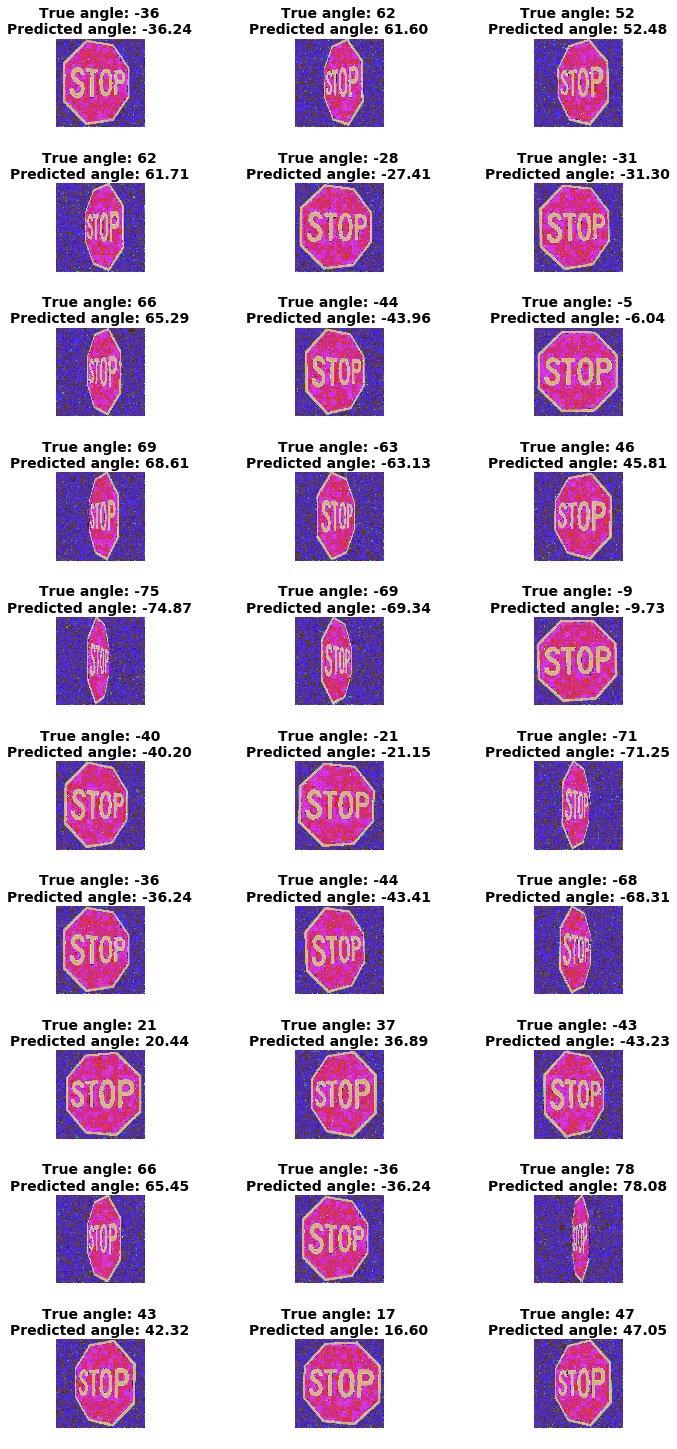

In [6]:
num_images = 30
utils.display_examples(
    model, 
    X_test,
    num_images=num_images,
    size=(275, 275),
    preprocess_func=preprocess_input
)

In [7]:
reload(utils) # for directly loading utils without restarting the kernel. This is for development and debug purpose

utils.py loaded


<module 'utils' from 'utils.pyc'>